In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv",encoding="utf-8")
test_df = pd.read_csv("test.csv",encoding="utf-8")
train_df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
5,0,78377,2295,465.62,5,0,N,2,N,N,...,0,6,104918.0,451,0,N,5817,102,0,2943
6,6411,94435,49219,1806.49,3,62,N,4,N,N,...,0,6,172624.0,339,0,N,5865,102,0,1622153
7,6769,112032,177989,526.88,6,62,N,2,N,N,...,0,7,34933.0,373,79200,N,5817,102,0,57795
8,6092,92294,85535,201.39,2,62,N,2,N,N,...,0,6,64652.0,264,8335,N,3585,102,0,836165
9,0,16279,110755,465.62,5,0,N,2,N,N,...,0,10,104447.0,451,0,N,5817,102,0,4507


In [2]:
train_df = train_df.fillna("N")

In [3]:
train_df["ecfg"] = train_df["ecfg"].apply(lambda x: 1 if x =='Y' else 0)
train_df["flbmk"] = train_df["flbmk"].apply(lambda x: 1 if x =='Y' else 0)
train_df["flg_3dsmk"] = train_df["flg_3dsmk"].apply(lambda x: 1 if x =='Y' else 0)
train_df["insfg"] = train_df["insfg"].apply(lambda x: 1 if x =='Y' else 0)
train_df["ovrlt"] = train_df["ovrlt"].apply(lambda x: 1 if x =='Y' else 0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["fraud_ind"],axis=1)
                                                    , train_df["fraud_ind"], test_size=0.33, random_state=42)

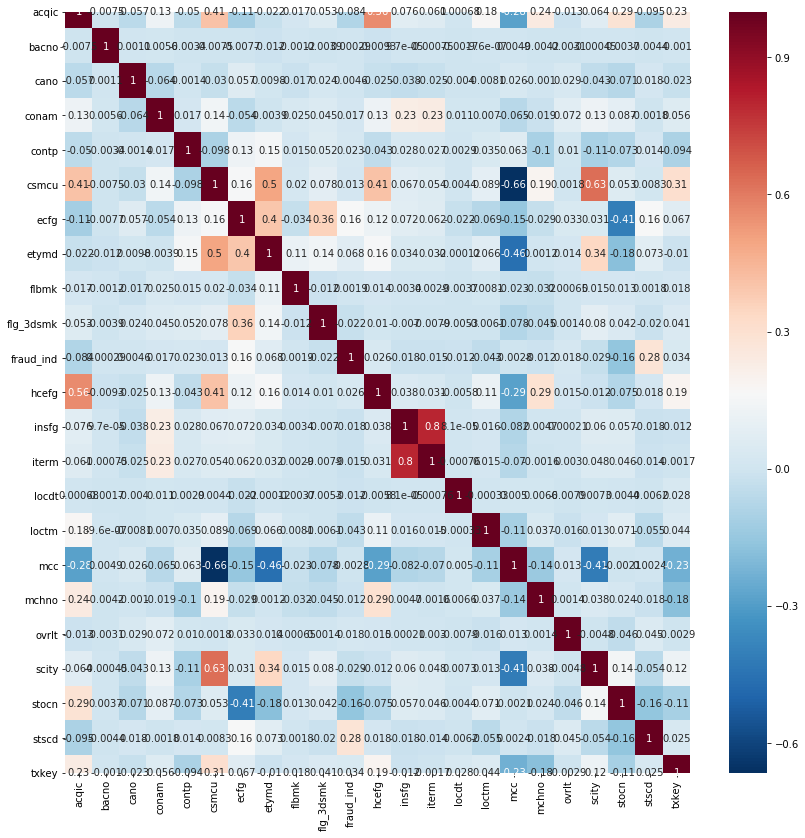

In [5]:
# heatmap API: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(train_df.corr(), annot=True, cmap="RdBu_r")

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
grid = {
    "n_estimators":range(25, 30, 1),
    "max_depth":range(8, 12)
}
gridsearch = GridSearchCV(clf, param_grid=grid, cv=10, n_jobs=8)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'max_depth': 11, 'n_estimators': 25}

In [ ]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(n_estimators=27, max_depth=9)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("十次:", scores)
print("平均:", np.average(scores))

In [ ]:
clf = RandomForestClassifier(n_estimators=27, max_depth=7)
clf.fit(x_train, y_train)

In [ ]:
result = pd.DataFrame()
pid = test_df["PassengerId"]
pre = clf.predict(test)
result["PassengerId"] = pid
result["Survived"] = pre
result.to_csv("titanic.csv", index=False)
result

In [ ]:
im = pd.DataFrame()
im["name"] = x_train.columns
im["importance"] = clf.feature_importances_
im